# Test agglomeration of segments

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np
import skimage
import skimage.morphology

In [16]:
f = h5py.File('neuron-volume-with-axons/x0y0z0.hdf5', 'r')
A = np.array(f['data'])
neuron_ids = f['neuron_ids']

In [17]:
f = h5py.File('segmentation-volume/x0y0z0.hdf5', 'r')
B = np.array(f['data'])

In [ ]:
#f = h5py.File('dendrites.hdf5', 'r')
#B = np.array(f['data'])

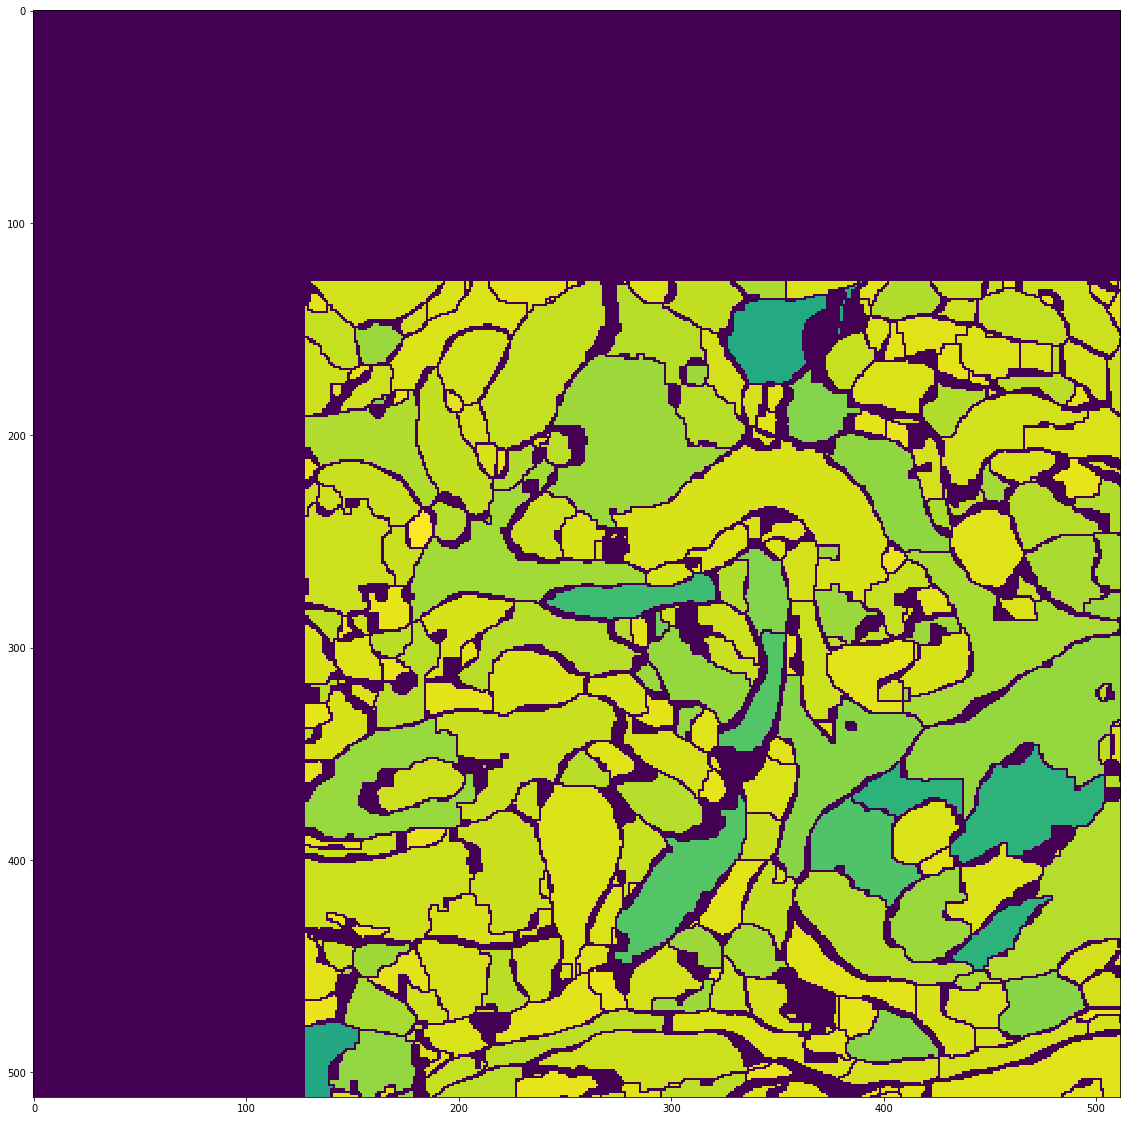

In [18]:
plt.figure(figsize=(20, 20))
plt.imshow(B[300, :512, :512])

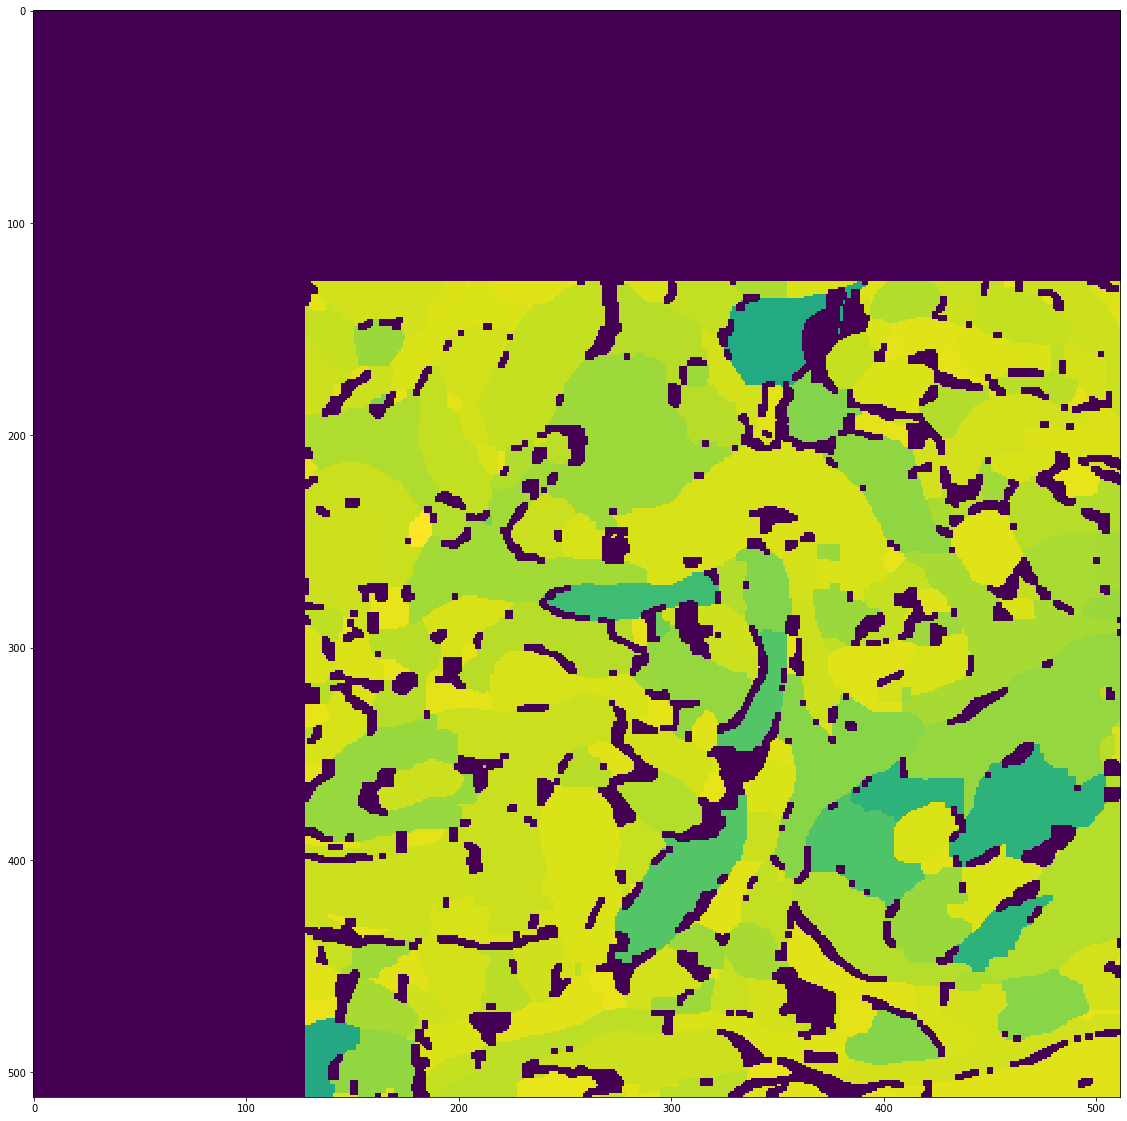

In [21]:
import scipy
plt.figure(figsize=(20, 20))
plt.imshow(scipy.ndimage.morphology.grey_erosion(scipy.ndimage.morphology.grey_dilation(B[300, :512, :512], size=3), size=3))

19

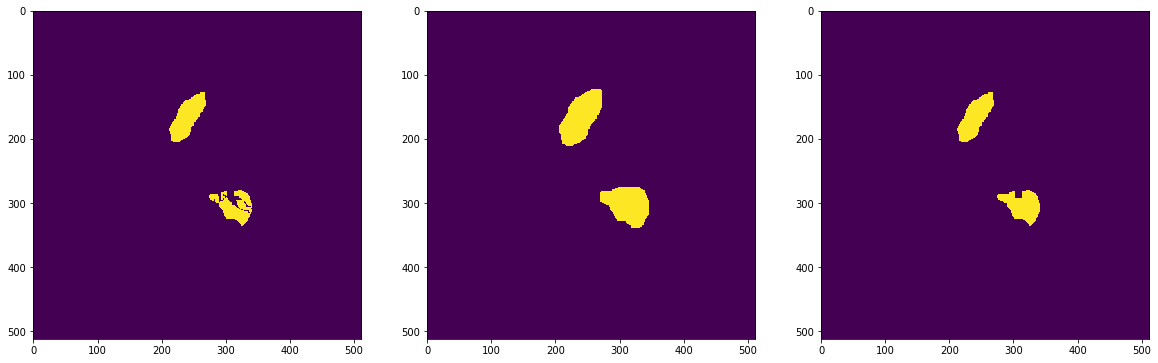

In [23]:
#mod_data = scipy.ndimage.morphology.grey_erosion(scipy.ndimage.morphology.grey_dilation(A[300, :512, :512], size=3), size=2)
plt.figure(figsize=(20, 20))
plt.subplot(131)
mod_data = A[300, :512, :512]
plt.imshow(mod_data)

plt.subplot(132)
mod_data = scipy.ndimage.morphology.grey_dilation(A[300, :512, :512], size=10)
plt.imshow(mod_data)

plt.subplot(133)
mod_data = scipy.ndimage.morphology.grey_erosion(scipy.ndimage.morphology.grey_dilation(A[300, :512, :512], size=10), size=10)

#cube = h5py.File('x0y0z0_closed.hdf5', 'w')
#cube.create_dataset('data', mod_data.shape, compression="gzip", data=mod_data)
#cube.create_dataset('neuron_ids', neuron_ids.shape, data=neuron_ids)
#cube.close()
plt.imshow(mod_data)
#mod_data.max()

In [70]:
%%time
from scipy.ndimage import morphology

neuron_id = 19
mask = A == neuron_id
#joined = morphology.binary_erosion(morphology.binary_fill_holes(morphology.binary_dilation(mask, iterations=3)), iterations=3)
mod_data = scipy.ndimage.morphology.grey_erosion(scipy.ndimage.morphology.grey_dilation(A, size=5), size=5)

Wall time: 2min 24s


In [49]:
# Compute the delta between the mask and the joined mask
deltas = joined.sum(0).sum(1) - mask.sum(0).sum(0)

In [59]:
# Check that we're only adding pixels and not removing (important at the boundaries)
for neuron_id in neuron_ids:
    mask = A == neuron_id
    big_mask = (mod_data == neuron_id)
    num_bad = (mask & ~big_mask).sum()
    num_added = big_mask.sum() - mask.sum()
    print("Neuron %d, num_bad %d, num added %d" % (neuron_id, num_bad, num_added))
#plt.plot(deltas)
#neuron_ids

Neuron 68, num_bad 0, num added 68428
Neuron 70, num_bad 0, num added 65386
Neuron 7, num_bad 0, num added 0
Neuron 79, num_bad 0, num added 8840
Neuron 19, num_bad 0, num added 54091
Neuron 20, num_bad 0, num added 4434
Neuron 88, num_bad 0, num added 231672
Neuron 89, num_bad 0, num added 75193
Neuron 32, num_bad 0, num added 52975
Neuron 33, num_bad 0, num added 1584
Neuron 37, num_bad 0, num added 50
Neuron 38, num_bad 0, num added 87867
Neuron 49, num_bad 0, num added 6397
Neuron 53, num_bad 0, num added 278
Neuron 58, num_bad 0, num added 5376


In [71]:
# Check that we're only adding pixels and not removing (important at the boundaries)
for neuron_id in neuron_ids:
    mask = A == neuron_id
    big_mask = (mod_data == neuron_id)
    num_bad = (mask & ~big_mask).sum()
    num_added = big_mask.sum() - mask.sum()
    print("Neuron %d, num_bad %d, num added %d" % (neuron_id, num_bad, num_added))
#plt.plot(deltas)
#neuron_ids

Neuron 68, num_bad 0, num added 72896
Neuron 70, num_bad 0, num added 74042
Neuron 7, num_bad 0, num added 0
Neuron 79, num_bad 0, num added 10231
Neuron 19, num_bad 0, num added 59124
Neuron 20, num_bad 0, num added 4647
Neuron 88, num_bad 0, num added 245647
Neuron 89, num_bad 0, num added 79095
Neuron 32, num_bad 2, num added 58993
Neuron 33, num_bad 0, num added 1980
Neuron 37, num_bad 0, num added 129
Neuron 38, num_bad 0, num added 95281
Neuron 49, num_bad 0, num added 6654
Neuron 53, num_bad 0, num added 882
Neuron 58, num_bad 0, num added 5962


In [76]:
neuron_id = 79
mask = A == neuron_id
deltas = (mod_data == neuron_id).sum(1).sum(0) - mask.sum(1).sum(0)
(deltas.argmax(), deltas.max())

(692, 308)

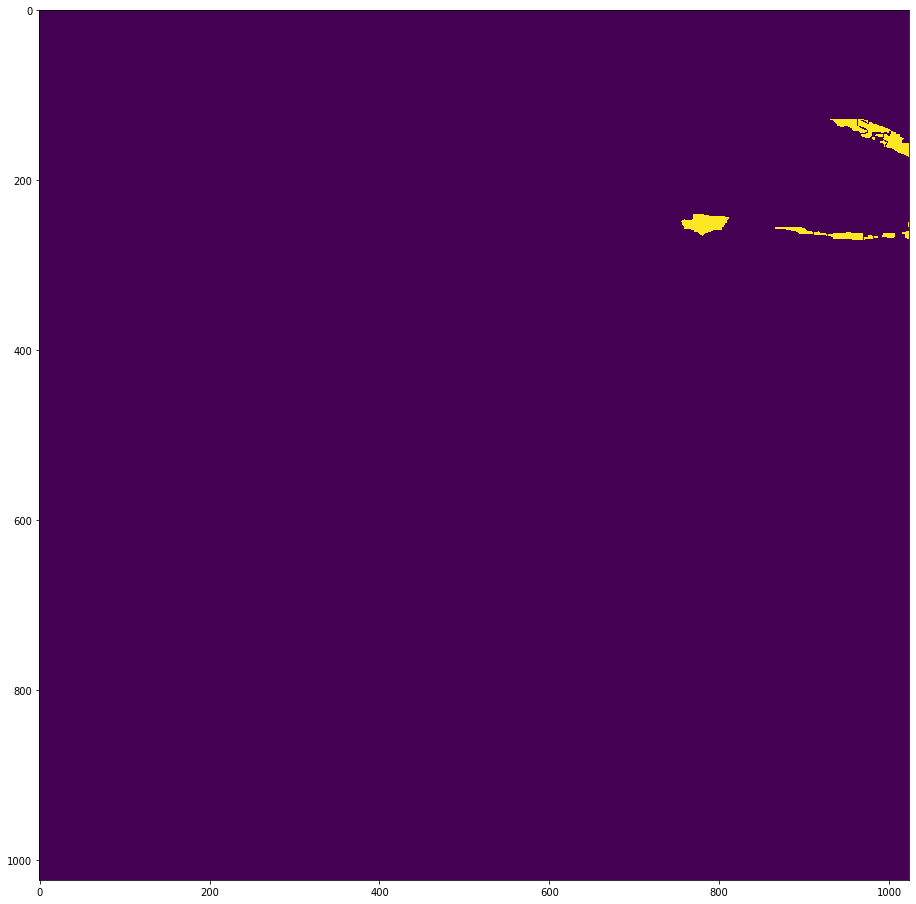

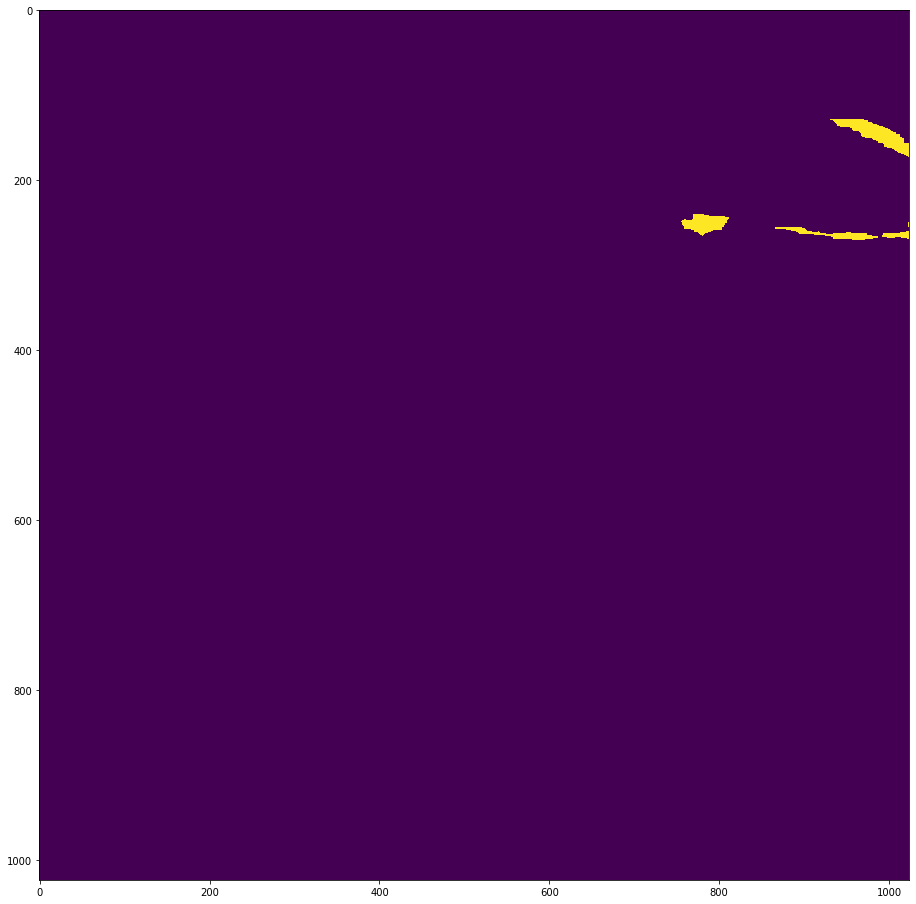

In [77]:
slc = 692

plt.figure(figsize=(16, 16))
plt.imshow(A[:, :, slc] == neuron_id)

plt.figure(figsize=(16, 16))
plt.imshow(mod_data[:, :, slc] == neuron_id)

In [4]:
arr2 = np.array([[3072.    , 1970.5   , 3087.6   ],
       [3072.    , 1970.5   , 3090.09  ],
       [3072.    , 1970.5   , 3092.58  ],
       [3072.    , 1971.    , 3093.825 ],
       [3072.    , 1971.5   , 3095.07  ],
       [3072.    , 1972.    , 3096.315 ],
       [3072.    , 1973.    , 3096.315 ],
       [3072.    , 1974.    , 3096.315 ],
       [3072.    , 1974.5   , 3097.56  ],
       [3072.    , 1975.    , 3098.805 ],
       [3072.    , 1976.    , 3098.805 ],
       [3072.    , 1976.5   , 3100.05  ],
       [3072.    , 1977.    , 3101.295 ],
       [3072.    , 1978.    , 3101.295 ],
       [3072.    , 1978.5   , 3102.54  ],
       [3072.    , 1979.    , 3103.785 ],
       [3072.    , 1980.    , 3103.785 ],
       [3072.    , 1980.5   , 3105.03  ],
       [3072.    , 1980.5   , 3107.52  ],
       [3072.    , 1980.5   , 3110.01  ],
       [3072.    , 1981.    , 3111.255 ],
       [3072.    , 1982.    , 3111.255 ],
       [3072.    , 1983.    , 3111.255 ],
       [3072.    , 1984.    , 3111.255 ],
       [3072.    , 1985.    , 3111.255 ],
       [3072.    , 1986.    , 3111.255 ],
       [3072.    , 1987.    , 3111.255 ],
       [3072.    , 1988.    , 3111.255 ],
       [3072.    , 1989.    , 3111.255 ],
       [3072.    , 1990.    , 3111.255 ],
       [3072.    , 1990.5   , 3112.5   ],
       [3072.    , 1991.    , 3113.7449],
       [3072.    , 1992.    , 3113.7449],
       [3072.    , 1993.    , 3113.7449],
       [3072.    , 1993.5   , 3114.99  ],
       [3072.    , 1994.    , 3116.2349],
       [3072.    , 1995.    , 3116.2349],
       [3072.    , 1996.    , 3116.2349],
       [3072.    , 1997.    , 3116.2349],
       [3072.    , 1997.5   , 3117.48  ],
       [3072.    , 1998.    , 3118.725 ],
       [3072.    , 1999.    , 3118.725 ],
       [3072.    , 2000.    , 3118.725 ],
       [3072.    , 2001.    , 3118.725 ],
       [3072.    , 2002.    , 3118.725 ],
       [3072.    , 2003.    , 3118.725 ],
       [3072.    , 2004.    , 3118.725 ],
       [3072.    , 2004.5   , 3119.97  ],
       [3072.    , 2004.5   , 3122.46  ],
       [3072.    , 2005.    , 3123.705 ],
       [3072.    , 2006.    , 3123.705 ],
       [3072.    , 2007.    , 3123.705 ],
       [3072.    , 2008.    , 3123.705 ],
       [3072.    , 2009.    , 3123.705 ],
       [3072.    , 2009.5   , 3122.46  ],
       [3072.    , 2009.    , 3121.215 ],
       [3072.    , 2008.5   , 3119.97  ],
       [3072.    , 2008.    , 3118.725 ],
       [3072.    , 2007.5   , 3117.48  ],
       [3072.    , 2007.    , 3116.2349],
       [3072.    , 2006.5   , 3114.99  ],
       [3072.    , 2006.5   , 3112.5   ],
       [3072.    , 2006.5   , 3110.01  ],
       [3072.    , 2006.    , 3108.765 ],
       [3072.    , 2005.5   , 3107.52  ],
       [3072.    , 2005.5   , 3105.03  ],
       [3072.    , 2005.    , 3103.785 ],
       [3072.    , 2004.5   , 3102.54  ],
       [3072.    , 2004.    , 3101.295 ],
       [3072.    , 2003.    , 3101.295 ],
       [3072.    , 2002.5   , 3100.05  ],
       [3072.    , 2002.    , 3098.805 ],
       [3072.    , 2001.    , 3098.805 ],
       [3072.    , 2000.    , 3098.805 ],
       [3072.    , 1999.    , 3098.805 ],
       [3072.    , 1998.    , 3098.805 ],
       [3072.    , 1997.    , 3098.805 ],
       [3072.    , 1996.5   , 3097.56  ],
       [3072.    , 1996.    , 3096.315 ],
       [3072.    , 1995.    , 3096.315 ],
       [3072.    , 1994.    , 3096.315 ],
       [3072.    , 1993.5   , 3095.07  ],
       [3072.    , 1993.    , 3093.825 ],
       [3072.    , 1992.    , 3093.825 ],
       [3072.    , 1991.    , 3093.825 ],
       [3072.    , 1990.    , 3093.825 ],
       [3072.    , 1989.5   , 3092.58  ],
       [3072.    , 1989.    , 3091.335 ],
       [3072.    , 1988.    , 3091.335 ],
       [3072.    , 1987.    , 3091.335 ],
       [3072.    , 1986.5   , 3090.09  ],
       [3072.    , 1986.    , 3088.845 ],
       [3072.    , 1985.    , 3088.845 ],
       [3072.    , 1984.    , 3088.845 ],
       [3072.    , 1983.5   , 3087.6   ],
       [3072.    , 1983.    , 3086.355 ],
       [3072.    , 1982.    , 3086.355 ],
       [3072.    , 1981.    , 3086.355 ],
       [3072.    , 1980.    , 3086.355 ],
       [3072.    , 1979.    , 3086.355 ],
       [3072.    , 1978.    , 3086.355 ],
       [3072.    , 1977.    , 3086.355 ],
       [3072.    , 1976.    , 3086.355 ],
       [3072.    , 1975.    , 3086.355 ],
       [3072.    , 1974.    , 3086.355 ],
       [3072.    , 1973.    , 3086.355 ],
       [3072.    , 1972.    , 3086.355 ],
       [3072.    , 1971.    , 3086.355 ],
       [3072.    , 1970.5   , 3087.6   ]], dtype=np.float32)

In [5]:
arr1 = np.array([[3071.    , 1974.    , 3088.845 ],
       [3071.    , 1973.5   , 3090.09  ],
       [3071.    , 1973.5   , 3092.58  ],
       [3071.    , 1974.    , 3093.825 ],
       [3071.    , 1974.5   , 3095.07  ],
       [3071.    , 1975.    , 3096.315 ],
       [3071.    , 1976.    , 3096.315 ],
       [3071.    , 1977.    , 3096.315 ],
       [3071.    , 1977.5   , 3097.56  ],
       [3071.    , 1978.    , 3098.805 ],
       [3071.    , 1979.    , 3098.805 ],
       [3071.    , 1980.    , 3098.805 ],
       [3071.    , 1980.5   , 3100.05  ],
       [3071.    , 1981.    , 3101.295 ],
       [3071.    , 1981.5   , 3102.54  ],
       [3071.    , 1982.    , 3103.785 ],
       [3071.    , 1982.5   , 3105.03  ],
       [3071.    , 1982.5   , 3107.52  ],
       [3071.    , 1983.    , 3108.765 ],
       [3071.    , 1984.    , 3108.765 ],
       [3071.    , 1985.    , 3108.765 ],
       [3071.    , 1986.    , 3108.765 ],
       [3071.    , 1987.    , 3108.765 ],
       [3071.    , 1988.    , 3108.765 ],
       [3071.    , 1989.    , 3108.765 ],
       [3071.    , 1990.    , 3108.765 ],
       [3071.    , 1991.    , 3108.765 ],
       [3071.    , 1992.    , 3108.765 ],
       [3071.    , 1992.5   , 3110.01  ],
       [3071.    , 1993.    , 3111.255 ],
       [3071.    , 1994.    , 3111.255 ],
       [3071.    , 1994.5   , 3112.5   ],
       [3071.    , 1995.    , 3113.7449],
       [3071.    , 1996.    , 3113.7449],
       [3071.    , 1996.5   , 3114.99  ],
       [3071.    , 1997.    , 3116.2349],
       [3071.    , 1998.    , 3116.2349],
       [3071.    , 1999.    , 3116.2349],
       [3071.    , 2000.    , 3116.2349],
       [3071.    , 2001.    , 3116.2349],
       [3071.    , 2002.    , 3116.2349],
       [3071.    , 2003.    , 3116.2349],
       [3071.    , 2004.    , 3116.2349],
       [3071.    , 2005.    , 3116.2349],
       [3071.    , 2005.5   , 3114.99  ],
       [3071.    , 2005.5   , 3112.5   ],
       [3071.    , 2005.5   , 3110.01  ],
       [3071.    , 2005.5   , 3107.52  ],
       [3071.    , 2005.5   , 3105.03  ],
       [3071.    , 2005.5   , 3102.54  ],
       [3071.    , 2005.    , 3101.295 ],
       [3071.    , 2004.    , 3101.295 ],
       [3071.    , 2003.    , 3101.295 ],
       [3071.    , 2002.    , 3101.295 ],
       [3071.    , 2001.    , 3101.295 ],
       [3071.    , 2000.    , 3101.295 ],
       [3071.    , 1999.    , 3101.295 ],
       [3071.    , 1998.    , 3101.295 ],
       [3071.    , 1997.5   , 3100.05  ],
       [3071.    , 1997.    , 3098.805 ],
       [3071.    , 1996.    , 3098.805 ],
       [3071.    , 1995.    , 3098.805 ],
       [3071.    , 1994.    , 3098.805 ],
       [3071.    , 1993.    , 3098.805 ],
       [3071.    , 1992.    , 3098.805 ],
       [3071.    , 1991.    , 3098.805 ],
       [3071.    , 1990.    , 3098.805 ],
       [3071.    , 1989.5   , 3097.56  ],
       [3071.    , 1989.    , 3096.315 ],
       [3071.    , 1988.    , 3096.315 ],
       [3071.    , 1987.    , 3096.315 ],
       [3071.    , 1986.5   , 3095.07  ],
       [3071.    , 1986.5   , 3092.58  ],
       [3071.    , 1986.    , 3091.335 ],
       [3071.    , 1985.    , 3091.335 ],
       [3071.    , 1984.5   , 3090.09  ],
       [3071.    , 1984.    , 3088.845 ],
       [3071.    , 1983.    , 3088.845 ],
       [3071.    , 1982.    , 3088.845 ],
       [3071.    , 1981.    , 3088.845 ],
       [3071.    , 1980.    , 3088.845 ],
       [3071.    , 1979.    , 3088.845 ],
       [3071.    , 1978.    , 3088.845 ],
       [3071.    , 1977.    , 3088.845 ],
       [3071.    , 1976.    , 3088.845 ],
       [3071.    , 1975.    , 3088.845 ],
       [3071.    , 1974.    , 3088.845 ]], dtype=np.float32)

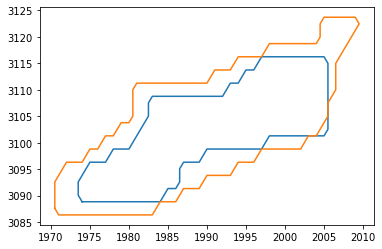

In [7]:
plt.plot(arr1[:, 1], arr1[:, 2])
plt.plot(arr2[:, 1], arr2[:, 2])

In [14]:
def grow_cluster(start_point, adjacency_matrix):
    cluster = {start_point: 1}
    len_before = 0
    len_after = 1
    
    while len_before < len_after:
        cluster_after = cluster.copy()
        for point, _ in cluster.items():
            for el1, el2 in adjacency_matrix:
                if el1 == point:
                    cluster_after[el2] = 1
        cluster = cluster_after
        len_before = len_after
        len_after = len(cluster)
    return cluster

def get_connected_components(adjacency_matrix):
    unique_el = {}
    for el1, el2 in adjacency_matrix:
        unique_el[el1] = 1
        unique_el[el2] = 1
        
    keys = list(unique_el.keys())
    cluster_memberships = {k: 0 for k in keys}
    
    # Start with key 0
    cluster_num = 1
    for k in keys:
        if cluster_memberships[k] == 0:
            cluster = grow_cluster(k, adjacency_matrix)
            for j in cluster.keys():
                cluster_memberships[j] = cluster_num
            cluster_num += 1
    return cluster_memberships
    
    
get_connected_components([(0, 1), (1, 0), (2, 3), (3, 4), (4, 7), (5, 6)])

{0: 1, 1: 1, 2: 2, 3: 2, 4: 2, 7: 2, 5: 3, 6: 3}